<a href="https://colab.research.google.com/github/whopriyam/IECSE-ML-Meet-/blob/master/MNIST_F_CNNs_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###Importing the Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential

#Warnings Removal
import logging
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR)

Using TensorFlow backend.


In [2]:
###Importing the Dataset from Keras

from keras.datasets.fashion_mnist import load_data

(X_train_orig,Y_train_orig),(X_test_orig,Y_test_orig) = load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
###Label Dictionary

label_dict = {0:'T-shirt/top',
              1:'Trouser',
              2:'Pullover',
              3:'Dress',
              4:'Coat',
              5:'Sandal',
              6:'Shirt',
              7:'Sneaker',
              8:'Bag',
              9:'Ankle boot'
}

In [4]:
###Overview of the Imported Data

print("X_train Original Shape:",X_train_orig.shape)
print("Y_train Original Shape:",Y_train_orig.shape)
print("X_test Original Shape:",X_test_orig.shape)
print("Y_test Original Shape:",Y_test_orig.shape)

X_train Original Shape: (60000, 28, 28)
Y_train Original Shape: (60000,)
X_test Original Shape: (10000, 28, 28)
Y_test Original Shape: (10000,)


Ankle boot


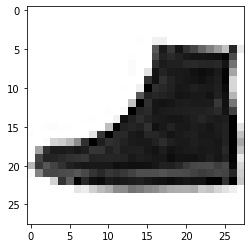

In [5]:
###Visualizing a Training Example

img_index = 4326 #Random Training Example
img = X_train_orig[img_index]
label = Y_train_orig[img_index]

print(label_dict[label])
plt.imshow(img,cmap='Greys')

In [0]:
###Preprocessing the Data

##Reshaping the X arrays
X_train = X_train_orig.reshape(X_train_orig.shape[0],28,28,1)
X_test = X_test_orig.reshape(X_test_orig.shape[0],28,28,1)

##Normalizing the Data
X_train = X_train/255
X_test = X_test/255

In [0]:
##One Hot encoding

Y_train = keras.utils.to_categorical(Y_train_orig,10)
Y_test = keras.utils.to_categorical(Y_test_orig,10)

In [8]:
###Overview of Processed Data

print('X_train Shape:',X_train.shape)
print('Y_train Shape:',Y_train.shape)
print('X_test Shape:',X_test.shape)
print('Y_test Shape:',Y_test.shape)

X_train Shape: (60000, 28, 28, 1)
Y_train Shape: (60000, 10)
X_test Shape: (10000, 28, 28, 1)
Y_test Shape: (10000, 10)


In [9]:
###Validation Split
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train, test_size =0.2, random_state = 42)

print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000, 10)
(12000, 10)


In [0]:
###Creating a Model
input_shape = (28,28,1) #Defining the input shape

model = Sequential() #Allowing the us to make the model, layer by layer.

model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME'))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME'))
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME'))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='softmax'))

In [0]:
###Compiling the Model(Choosing our optimizer,our loss function and our metric for perfromance)

model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['categorical_accuracy'])

In [0]:
###Hyperparameters

epochs = 50
batch_size = 128

In [13]:
###Training the model

history = model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val,Y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 20s 418us/step - loss: 0.8847 - categorical_accuracy: 0.6653 - val_loss: 0.4970 - val_categorical_accuracy: 0.8078
Epoch 2/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.4723 - categorical_accuracy: 0.8295 - val_loss: 0.3540 - val_categorical_accuracy: 0.8672
Epoch 3/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.3875 - categorical_accuracy: 0.8602 - val_loss: 0.3023 - val_categorical_accuracy: 0.8869
Epoch 4/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.3439 - categorical_accuracy: 0.8761 - val_loss: 0.2792 - val_categorical_accuracy: 0.8938
Epoch 5/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.3164 - categorical_accuracy: 0.8868 - val_loss: 0.2728 - val_categorical_accuracy: 0.9021
Epoch 6/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.2978 - categ

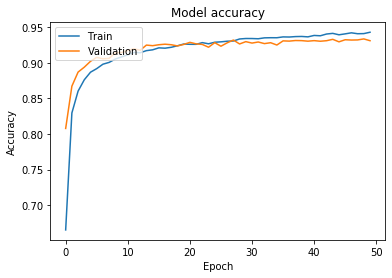

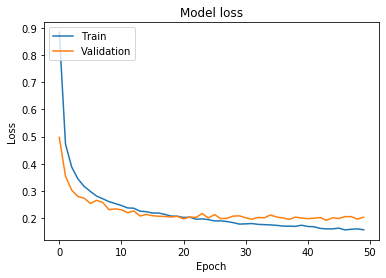

In [14]:
###Plotting the Results

##Accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
###Performance on the Test Set

results = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('test loss, test acc:', results)

10000/10000 [==============================] - 0s 34us/step
test loss, test acc: [0.23358430321216583, 0.9252]


Actual: Sneaker
Prediction: Sandal


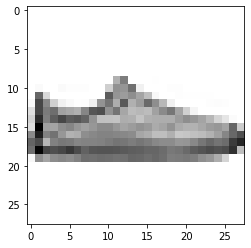

Actual: Ankle boot
Prediction: Sandal


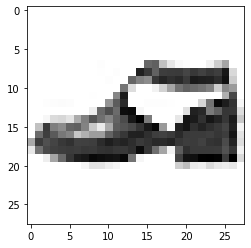

Actual: Coat
Prediction: Pullover


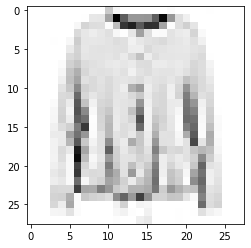

Actual: Shirt
Prediction: T-shirt/top


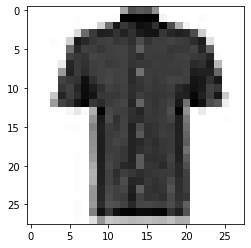

Actual: Dress
Prediction: Shirt


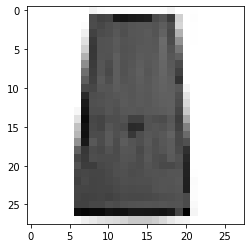

In [16]:
###Checking out the Wrong Predictions

predictions = model.predict(X_test)
wrong_predictions = list()

for ind in range(len(predictions)):
  if np.argmax(predictions[ind,:,]) != np.argmax(Y_test[ind,:]):
    wrong_predictions.append(ind)

for ind in wrong_predictions[:5]:
  img = X_test_orig[ind]
  label = np.argmax(Y_test[ind])
  prediction = np.argmax(predictions[ind])

  print('Actual:',label_dict[label])
  print('Prediction:',label_dict[prediction])
  plt.imshow(img,cmap='Greys')
  plt.show()